We really need a way to determine photo-z accuracy as a function of filter distribution.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [2]:
# Really, there's a util for this
fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = os.path.join(fdir, 'throughputs', 'baseline')


In [3]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))


In [4]:
data = pd.read_csv('CWW_Scd_ext.sed', comment='#', delimiter=' ')



In [5]:
gal = Sed()

In [6]:
gal.setSED(data['Angstroms'].values/10., flambda=data['Flux/A'].values*10)

(0.0, 800.0)

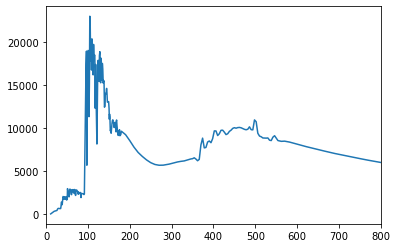

In [7]:
plt.plot(gal.wavelen, gal.flambda)
plt.xlim([0,800])

In [8]:
redshifts = (np.arange(0,2.55, .01))
mags = {}
filternames = 'ugrizy'
for filtername in filternames:
    mags[filtername] = []

In [9]:
temp_gal = Sed()
for z in redshifts:
    w,fl = gal.redshiftSED(z, wavelen=gal.wavelen, flambda=gal.flambda)
    temp_gal.setSED(w, flambda=fl)
    for filtername in filternames:
        mags[filtername].append(temp_gal.calcMag(lsst[filtername]))

In [10]:
for filtername in filternames:
    mags[filtername] = np.array(mags[filtername])

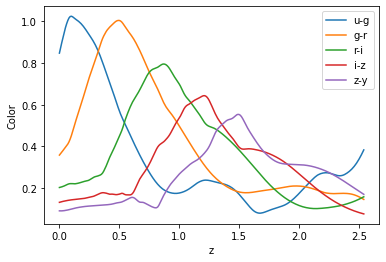

In [11]:
for f1,f2 in zip('ugriz', 'grizy'):
    plt.plot(redshifts, mags[f1]-mags[f2], label='%s-%s' % (f1,f2))

plt.xlabel('z')
plt.ylabel('Color')
plt.legend()

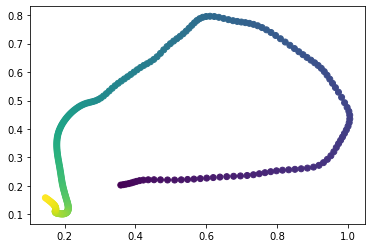

In [12]:
plt.scatter(mags['g']-mags['r'], mags['r']-mags['i'], c=redshifts)

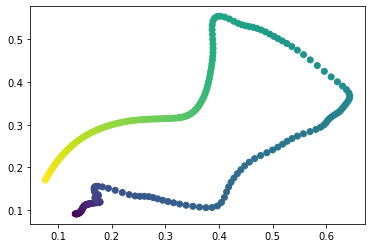

In [13]:
plt.scatter(mags['i']-mags['z'], mags['z']-mags['y'], c=redshifts)

In [14]:
# So, why not just generate an array of color + random uncerts. Find nearest neighbor 
# OK, so this is clearly a kdtree kind of problem. 

# No reason I can't do this same procedure for stellar parameters as well. I can make an array of colors and 
# also teff,logg,z. 


In [15]:
fiducial_mag = 23
delta = fiducial_mag - mags['r']

In [16]:
for filtername in filternames:
    mags[filtername] += delta

In [17]:
mags['i']

array([22.79679413, 22.7953152 , 22.7936338 , 22.79170976, 22.78934465,
       22.78659929, 22.78383067, 22.78122237, 22.77921912, 22.77824673,
       22.77806436, 22.77833317, 22.77887799, 22.77904838, 22.77832039,
       22.77709328, 22.77572522, 22.77411938, 22.77229743, 22.77046118,
       22.76873405, 22.76720048, 22.76589955, 22.76469858, 22.76314015,
       22.76054366, 22.75700354, 22.75327791, 22.74974353, 22.74670565,
       22.74458601, 22.74312252, 22.74154514, 22.73959411, 22.73720667,
       22.73367701, 22.72753692, 22.71802294, 22.70645877, 22.69385923,
       22.67974548, 22.66494888, 22.65142558, 22.63961697, 22.62801637,
       22.61575838, 22.60317852, 22.59030649, 22.57750227, 22.56448738,
       22.55115543, 22.53789159, 22.52414538, 22.50767415, 22.48865211,
       22.47070635, 22.4546611 , 22.43963817, 22.42492502, 22.41118274,
       22.39844055, 22.38690755, 22.37678505, 22.36751381, 22.35828725,
       22.34876532, 22.33895865, 22.32855987, 22.31752868, 22.30